In [31]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

from collections import Counter

# Sklearn imports 
from sklearn.preprocessing import MinMaxScaler

# getting the data 
df = pd.read_csv("abalone.csv")

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Explolatory Data Analysis
this will include the following
- getting the overall view of the data
- getting the visual view of the data

In [32]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(None, (4177, 9))

In [33]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [34]:
# since Sex is unique
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

/usr/lib/python3/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


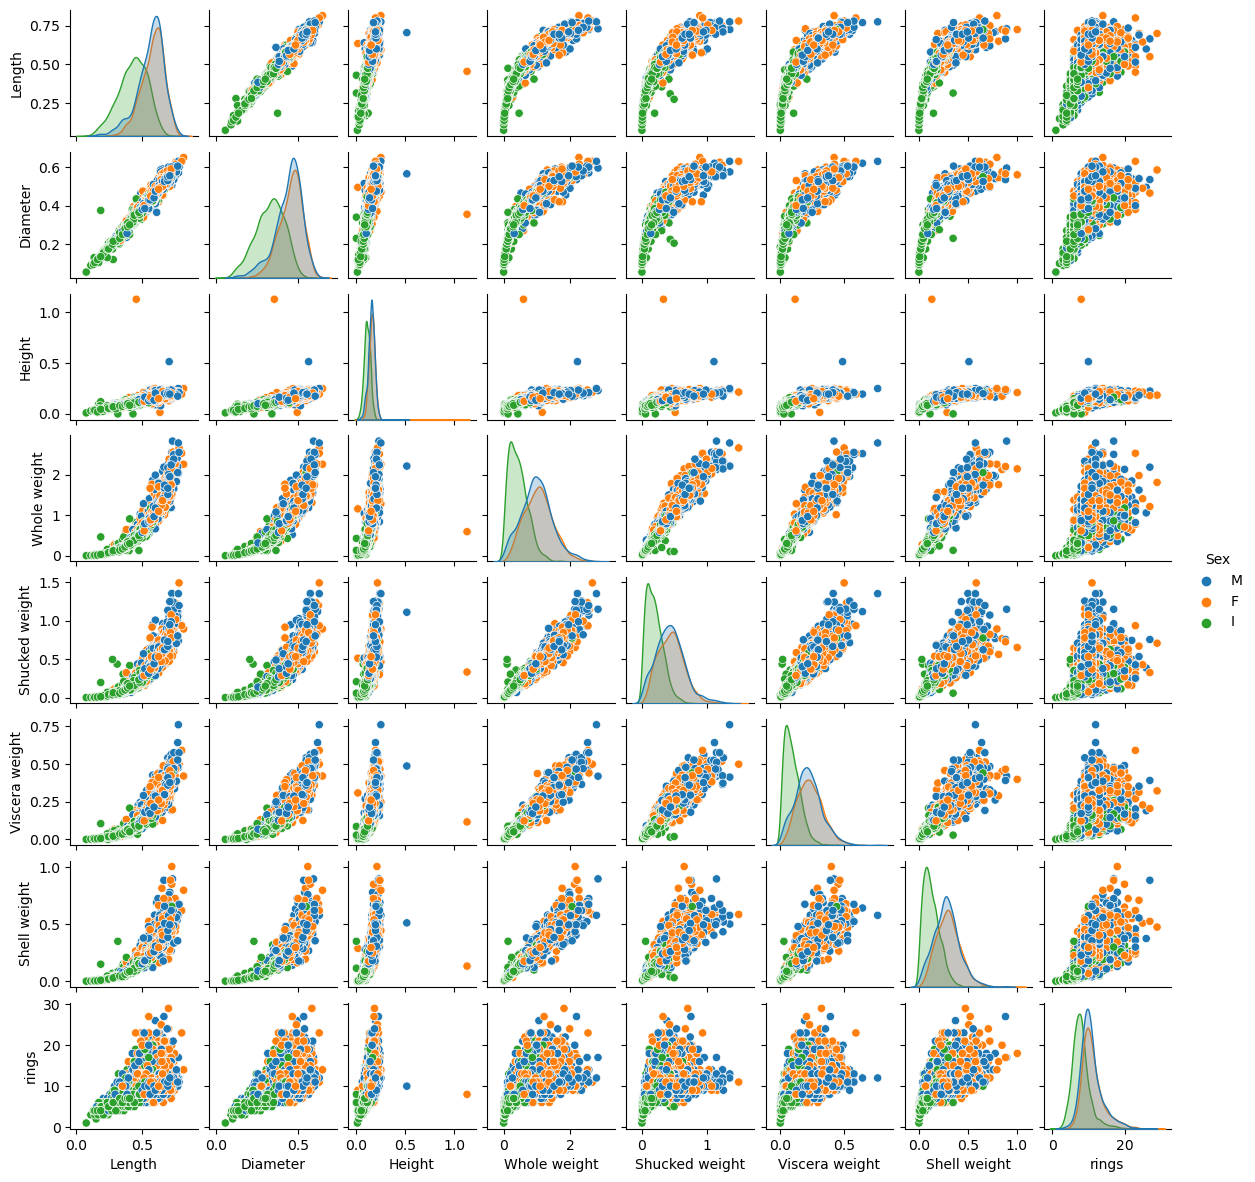

In [35]:
sns.pairplot(data=df, hue="Sex", size=1.5)

In [36]:
# counts in the sex data

Counter(df["Sex"])

Counter({'M': 1528, 'F': 1307, 'I': 1342})

In [37]:
# changing sex to int
df = df.replace('M', 0)
df = df.replace('F', 1)
df = df.replace('I', 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [38]:
# performing a scaling
scale = MinMaxScaler()

scale_dict = {}

for col in ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]:
    scale.fit(np.array(df[col]).reshape(-1, 1))
    scale_dict[col] = scale
    df[col] = scale.transform(np.array(df[col]).reshape(-1, 1))

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,15
1,0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7
2,1,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9
3,0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10
4,2,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,11
4173,0,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,10
4174,0,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,9
4175,1,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,10


(array([   7.,   60.,  147.,  304.,  460.,  778., 1051., 1017.,  324.,
          29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

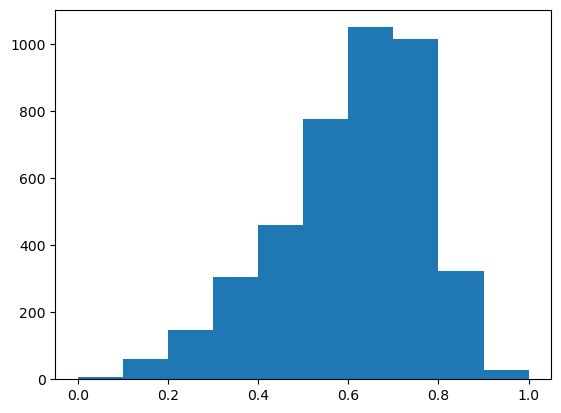

In [39]:
# removing outliers 
plt.hist(df["Length"])